Casino Profit/Loss (Positive = Loss) 69904


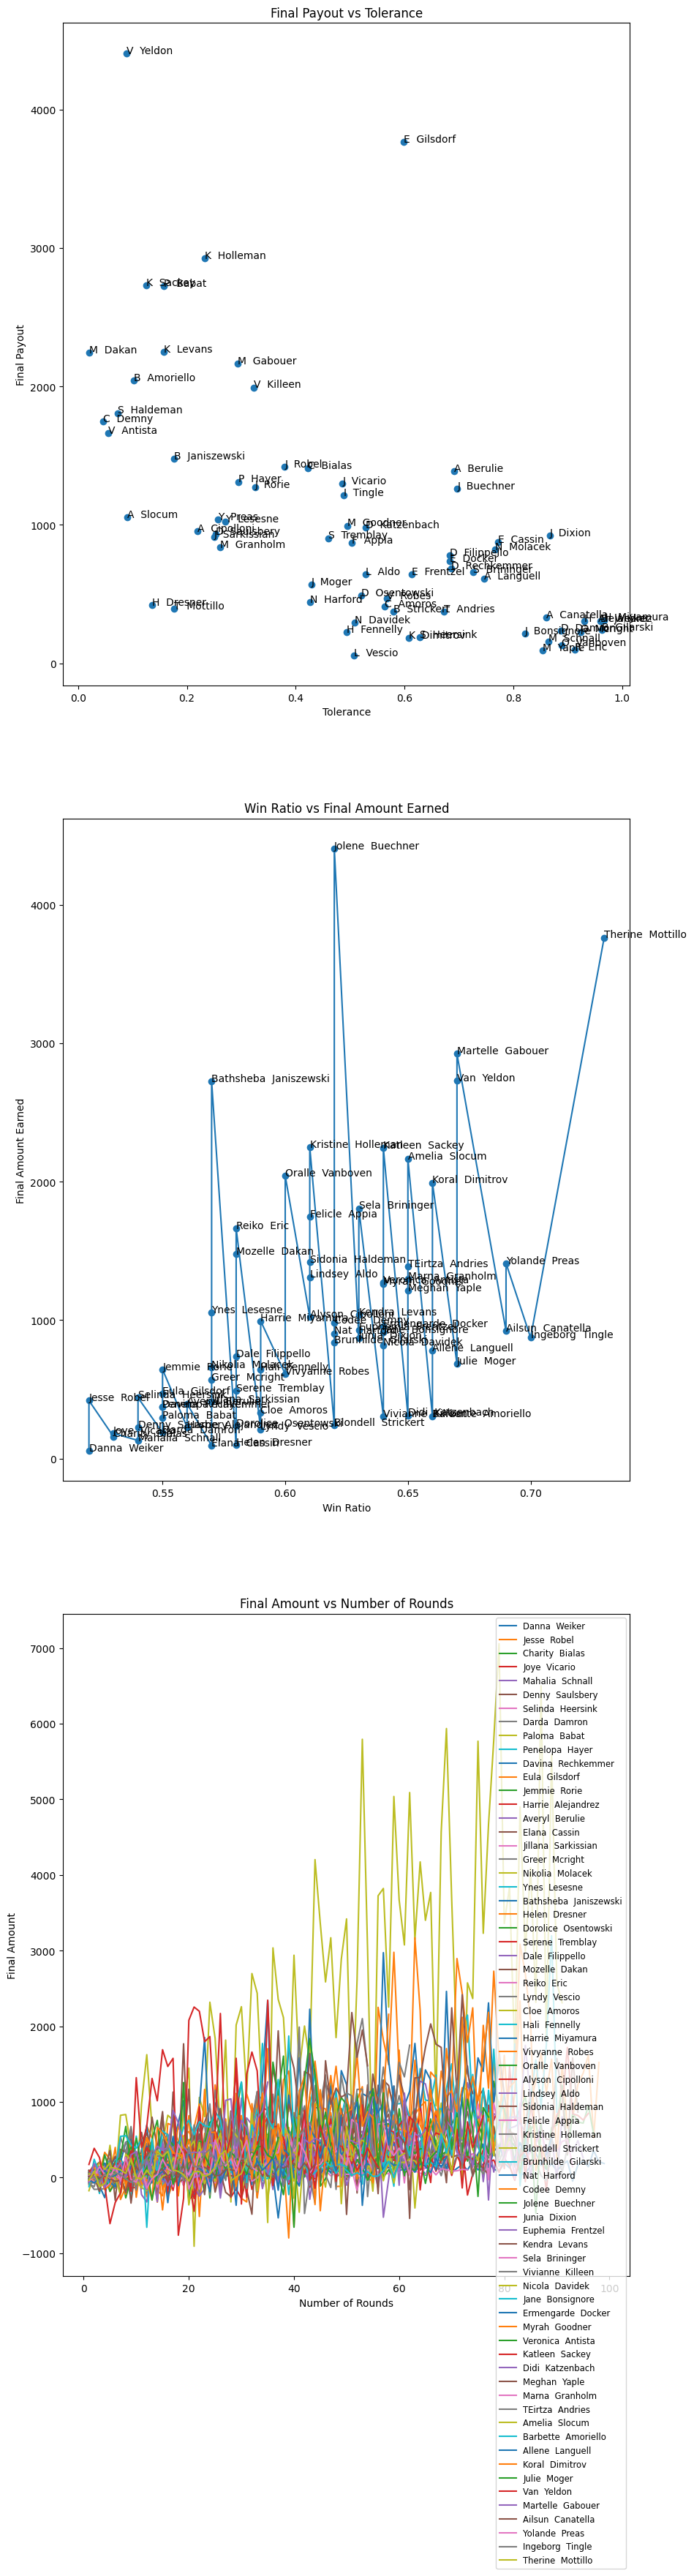

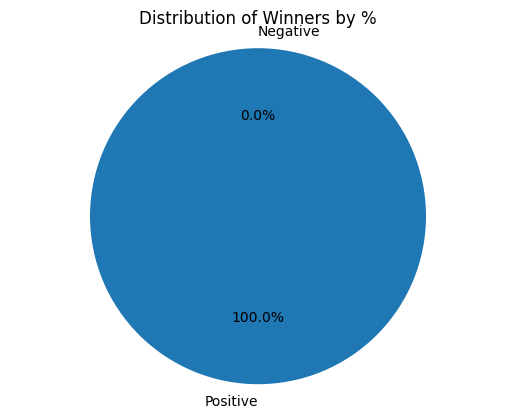

In [82]:
import random
import csv
import numpy as np
import matplotlib.pyplot as mpl

# Reading/opening the CSV
def read_persons_csv():
    persons = []
    with open("persons.csv", 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        # Skip the header row
        next(reader)
        for row in reader:
            # Create a dictionary containing the person's information
            person = {
                'first_name': row[0],
                'last_name': row[1],
                'age': int(row[2]),
                'occupation': row[3],
                'salary': float(row[4]),
                'savings': float(row[6]),
                'tolerance': float(row[12])
            }
            persons.append(person)
    # print(persons)
    return persons
    # Find the amount the person will bet

def get_bet_amount(person):
    # Determine the bet amount based on the person's salary and savings
    # bet_percentage = (person['savings'] * 0.10)
    bet_percentage = (person['salary'] + person['savings']) / 100000
    mult = 1
    ptolerance = person['tolerance']
    while ptolerance > 0:
        if ptolerance >= 0.1:
            mult -= 0.1
            ptolerance -= 0.1
        else:
            break
    #adding random.randrange may negate the fact of people betting safely at high tolerance vs low tolerence people
    bet_amount = bet_percentage * (mult * random.randrange(50, 150))
    return round(bet_amount)

# def simulate_game(deck_count, player):
#     # Determine the bet amount for this simulation run
#     bet_amount = get_bet_amount(player)
#     if bet_amount == 0:
#         print(f"{player['first_name']} {player['last_name']} ({player['occupation']}) isn't betting anything this round.")
#         return
    
def simulate_game(deck_count, min_bet, max_bet, player):
    # Set up the game
    player_hand = [draw_card() for _ in range(2)]
    dealer_hand = [draw_card(), draw_card()]
    # Adjust bet_amount to be in accordance with tolerance.
    # bet_amount = random.randint(min_bet, max_bet)
    bet_amount = get_bet_amount(player)

    # Player's turn
    while get_hand_value(player_hand) < 21:
        # Use a simple strategy of hitting until the hand is worth 17 or more
        if get_hand_value(player_hand) < 17:
            player_hand.append(draw_card())
        else:
            break

    # Dealer's turn
    while get_hand_value(dealer_hand) < 17:
        dealer_hand.append(draw_card())

    # Determine the outcome of the game
    # print('Player Hand', player_hand)
    # print('Dealer Hand', dealer_hand)
    player_value = get_hand_value(player_hand)
    dealer_value = get_hand_value(dealer_hand)
    
    if player_value > 21:
        return bet_amount * -1
    elif dealer_value > 21 or player_value > dealer_value and player_value < 22:
        return bet_amount
    elif player_value == dealer_value:
        return bet_amount * -1
    else:
        return bet_amount

#Revamp draw card to be unique, AKA the whole deck and then remove the card from the deck after drawing.
#using append and pop should fix this.
def draw_card():
    # Simulate drawing a card from a deck
    card_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    return random.choice(card_values)

def get_hand_value(hand):
    # Calculate the value of a hand, accounting for aces
    value = sum(hand)
    if value > 21 and 11 in hand:
        value -= 10
    return value

# Read in the persons CSV file
persons = read_persons_csv()
tolerances = []
final_payouts = []
win_ratios = []

# Run the simulation for each person
# First Name Last Name, Win Ratio, Total Wins, Total Losses [Done]
casinoIncome = 0
for person in persons:
    num_rounds = 100
    results = [simulate_game(6, 10, 100, person) for _ in range(num_rounds)]
    win_ratio = sum([r > 0 for r in results]) / num_rounds
    average_payout = sum(results) / num_rounds
    final = sum(results)
    casinoIncome += final
    tolerance = person['tolerance']
    tolerances.append(tolerance)
    final_payouts.append(final)
    win_ratios.append(win_ratio)
    # print(f"{person['first_name']} {person['last_name']}: Win ratio = {win_ratio:.2f}, Average payout = ${average_payout:.2f}, Final Payout = ${final}, Tolerance = {tolerance:.2f}")
    # Add a variable to calculate total net/loss for the day of the casino
print('Casino Profit/Loss (Positive = Loss)', casinoIncome)

fig, axs = mpl.subplots(3, 1, figsize=(10, 40))

# SCATTER CHART
axs[0].scatter(tolerances, final_payouts)
axs[0].set_xlabel('Tolerance')
axs[0].set_ylabel('Final Payout')
axs[0].set_title('Final Payout vs Tolerance')

# Labels for each person
for i, person in enumerate(persons):
    axs[0].text(tolerances[i], final_payouts[i], f"{person['first_name'][0]} {person['last_name']}")

# PIE CHART
positive_final = [final for final in final_payouts if final > 0]
negative_final = [final for final in final_payouts if final < 0]
positive_count = len(positive_final)
negative_count = len(negative_final)
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
mpl.figure()
mpl.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
mpl.axis('equal')
mpl.title('Distribution of Winners by %')

# LINE PLOT
sorted_data = sorted(zip(win_ratios, final_payouts))

sorted_win_ratios, sorted_final_amounts = zip(*sorted_data)
axs[1].plot(sorted_win_ratios, sorted_final_amounts, marker='o')
axs[1].set_xlabel('Win Ratio')
axs[1].set_ylabel('Final Amount Earned')
axs[1].set_title('Win Ratio vs Final Amount Earned')

# Labels for each person
for i, person in enumerate(persons):
    axs[1].text(sorted_win_ratios[i], sorted_final_amounts[i], f"{person['first_name']} {person['last_name']}")

for i, person in enumerate(persons):
    final_amounts_person = []
    num_rounds_list = list(range(1, num_rounds))  # Number of rounds to be plotted
    for num_rounds in num_rounds_list:
        results = [simulate_game(6, 10, 100, person) for _ in range(num_rounds)]
        final = sum(results)
        final_amounts_person.append(final)
    axs[2].plot(num_rounds_list, final_amounts_person, label=f"{person['first_name']} {person['last_name']}")

axs[2].set_xlabel('Number of Rounds')
axs[2].set_ylabel('Final Amount')
axs[2].set_title('Final Amount vs Number of Rounds')
axs[2].legend(fontsize='small')
    
mpl.show()

